# Preprocessing
Only features needed are reviewText and overall(product rating)

In [ ]:
import json
import re

train = open('training_data','w')
test = open('test_data','w')

with open('Electronics_sentiment.json', 'r') as json_file: # took just 2000 rows from the og dataset
    line = 0
    for json_line in json_file:
        row = json.loads(json_line)
        review = row["reviewText"].lower()
        review = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',review) # as links have no context here, removing them
        review = re.sub('[\s]+', ' ', review)
        review = re.sub(r'\W*\b\w{1,3}\b', '', review)
        review = review.strip()
        line = line + 1
        if row["overall"] == 1.0 or row["overall"] == 2.0:
            sentiment = "negative"
        elif row["overall"] == 3.0:
            sentiment = "neutral"
        else:
            sentiment = "positive"
        if line%6 == 0:
            print(f'__label__{sentiment} {review}', file=test)
        else:
            print(f'__label__{sentiment} {review}', file=train)

train.close()
test.close()

# Install fastText

In [ ]:
!git clone https://github.com/facebookresearch/fastText.git
%cd fastText
!pip install .

fatal: destination path 'fastText' already exists and is not an empty directory.
/home/viswa/sentiment_analysis/fastText
Defaulting to user installation because normal site-packages is not writeable
Processing /home/viswa/sentiment_analysis/fastText
  Preparing metadata (setup.py) ... done
  Created wheel for fasttext: filename=fasttext-0.9.2-cp39-cp39-linux_x86_64.whl size=3125232 sha256=cadb0caf4ad705de0a7adfdb1f53baf4a5e023563d1e7057d4df0b16d9eae37c
  Stored in directory: /tmp/pip-ephem-wheel-cache-v615hk7b/wheels/f2/81/5e/a8fcef93ac118be279658eeb38dd204d983db5e55cc2839968
Successfully built fasttext
  Attempting uninstall: fasttext
    Found existing installation: fasttext 0.9.2
    Uninstalling fasttext-0.9.2:
      Successfully uninstalled fasttext-0.9.2

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip


# Training and testing the classifier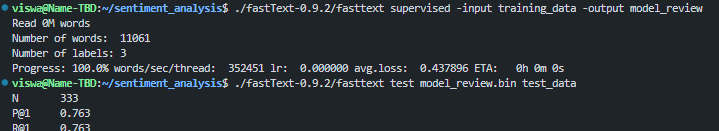

# Test the classifier using fastText API

In [ ]:
from fasttext import load_model
classifier = load_model("/home/viswa/sentiment_analysis/model_review.bin")
reviews = ['Would not recommend it to anyone', 'Proud to own this', 'Love it. I use it all the time']
labels = classifier.predict(reviews)
print (labels)

([['__label__positive'], ['__label__positive'], ['__label__positive']], [array([0.9992331], dtype=float32), array([0.99999833], dtype=float32), array([0.99982566], dtype=float32)])


I suppose since the data is not uniform in terms of the labels. In the dataset, I see only 1 negative review for every ~10 positive reviews, the model is not able to classify the negative reviews correctly